In [55]:
import requests
from bs4 import BeautifulSoup
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from termcolor import colored, cprint

In [56]:
base_url = "https://understat.com/match/"
match_id =  str(input('Enter Match ID:'))
url = base_url + match_id

In [57]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
title = str(soup.find_all('title'))
title = (title.split('>'))
title = title[1]
title = (title.split('|'))
title_main = title[0]
title_sub = title[1] + title[2]

title_main = (title_main.split('-'))
title_main_home = title_main[0]
title_main_away = title_main[1]

In [58]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [59]:
strings = scripts[1].string

index_start = strings.index("('")+2
index_end = strings.index("')")

json_data = strings[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

In [60]:
team = []
minute = []
xG = []
data_home = data['h']
data_away = data['a']
player = []
result = []
hora = []

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'h_a':
            hora.append(data_home[index][key])
        
for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])   
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'h_a':
            hora.append(data_away[index][key])

In [61]:
col_names = [ 'team', 'minute', 'xG', 'player', 'result', 'hora']
df = pd.DataFrame([team,minute,xG,player,result,hora], index = col_names)
df = df.T

df['xG'] = pd.to_numeric(df['xG'])

df.loc[df['hora'] == 'h', 'hora'] = 0
df.loc[df['hora'] == 'a', 'hora'] = 1

In [62]:
df

,team,minute,xG,player,result,hora
0,Brighton,10,0.092165,Alireza Jahanbakhsh,MissedShots,0
1,Brighton,14,0.022700,Alexis Mac Allister,BlockedShot,0
2,Brighton,15,0.107578,Dan Burn,MissedShots,0
3,Brighton,23,0.078521,Bernardo,BlockedShot,0
4,Brighton,23,0.048445,Davy Pröpper,BlockedShot,0
5,Brighton,35,0.025895,Alexis Mac Allister,MissedShots,0
6,Brighton,36,0.020132,Davy Pröpper,BlockedShot,0
7,Brighton,36,0.081486,Alireza Jahanbakhsh,SavedShot,0
8,Brighton,45,0.024483,Bernardo,MissedShots,0
9,Brighton,45,0.115015,Bernardo,BlockedShot,0


In [63]:
Team_Names = df.team.unique()
Home_Team_Name = str(Team_Names[0])
Away_Team_Name = str(Team_Names[1])

In [64]:
last_shot_minute = int(max(minute))
print(last_shot_minute)

if last_shot_minute < 90:
    last_shot_minute = 90
elif last_shot_minute >= 90:
    last_shot_minute = last_shot_minute

87


In [65]:
team = []
minute = []
xG = []
data_home = data['h']
data_away = data['a']
player = []
result = []
hora = []


In [66]:
for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'h_a':
            hora.append(data_home[index][key])

col_names = [ 'team', 'minute', 'xG', 'player', 'result', 'hora']
df_home = pd.DataFrame([team,minute,xG,player,result,hora], index = col_names)
df_home = df_home.T

df_home['xG'] = pd.to_numeric(df_home['xG']) 

df_home.loc[df_home['hora'] == 'h', 'hora'] = 0 
df_home.loc[df_home['hora'] == 'a', 'hora'] = 1

In [67]:
col_names = [ 'minute', 'xG']
df_zero = pd.DataFrame([0,0], index = col_names)
df_zero = df_zero.T

In [68]:
minute = [int(i) for i in minute]

xG = [float(i) for i in xG]
xG = np.cumsum(xG)

xG_home_max = max(xG)
col_names = [ 'minute', 'xG']
df_home_max = pd.DataFrame([last_shot_minute,xG_home_max], index = col_names)
df_home_max = df_home_max.T

col_names = [ 'minute', 'xG']
xG_home = pd.DataFrame([minute,xG], index = col_names)
xG_home = xG_home.T
xG_home = df_zero.append(xG_home)
xG_home = xG_home.append(df_home_max)
xG_home

,minute,xG
0,0.0,0.000000
0,10.0,0.092165
1,14.0,0.114865
2,15.0,0.222443
3,23.0,0.300964
4,23.0,0.349409
5,35.0,0.375304
6,36.0,0.395436
7,36.0,0.476922
8,45.0,0.501405


In [69]:
team = []
minute = []
xG = []
data_home = data['h']
data_away = data['a']
player = []
result = []
hora = []

In [70]:
for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])   
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'h_a':
            hora.append(data_away[index][key])

col_names = [ 'team', 'minute', 'xG', 'player', 'result', 'hora']
df_away = pd.DataFrame([team,minute,xG,player,result,hora], index = col_names)
df_away = df_away.T 

df_away['xG'] = pd.to_numeric(df_away['xG']) 

df_away.loc[df_away['hora'] == 'h', 'hora'] = 0 
df_away.loc[df_away['hora'] == 'a', 'hora'] = 1

In [71]:
minute = [int(i) for i in minute]

xG = [float(i) for i in xG]
xG = np.cumsum(xG)

xG_away_max = max(xG)
col_names = [ 'minute', 'xG']
df_away_max = pd.DataFrame([last_shot_minute,xG_away_max], index = col_names)
df_away_max = df_away_max.T

col_names = [ 'minute', 'xG']
xG_away = pd.DataFrame([minute,xG], index = col_names)
xG_away = xG_away.T
xG_away = df_zero.append(xG_away)
xG_away = xG_away.append(df_away_max)
xG_away

,minute,xG
0,0.0,0.000000
0,27.0,0.055635
1,49.0,0.664593
2,50.0,0.690879
3,50.0,0.745123
4,51.0,0.801316
5,53.0,0.858447
6,56.0,0.874489
7,59.0,0.962247
8,60.0,1.091728


In [72]:
xG_overall_max =  max(xG_home_max, xG_away_max)

In [73]:
xG_home_suptitle = round(xG_home_max,2)
xG_away_suptitle = round(xG_away_max,2)

In [74]:
plt_suptitle = title_main_home + '(' + str(xG_home_suptitle) + ")" + " - "+ '(' + str(xG_away_suptitle) + ')' + title_main_away 

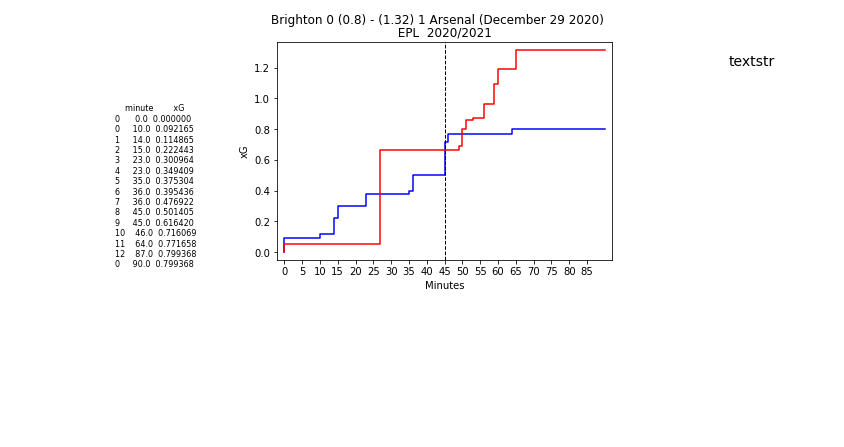

In [75]:

plt.plot(xG_home.minute,xG_home.xG, drawstyle='steps-pre', color = 'b')
plt.plot(xG_away.minute,xG_away.xG, drawstyle='steps-pre', color = 'r')

plt.title(title_sub)
plt.suptitle(plt_suptitle)

plt.xlabel('Minutes')
plt.ylabel('xG', rotation = 90)
plt.axvline(x=45, color='black', linestyle='--', linewidth=1.0)

x_ticks = np.arange(0, last_shot_minute, 5)
plt.xticks(x_ticks)
plt.xlim([-2, last_shot_minute + 2])

y_ticks = np.arange(0, xG_overall_max, 0.2)
plt.yticks(y_ticks)
plt.ylim([-0.05, xG_overall_max + 0.05])

plt.gcf().text(-0.25, 0.1, str(xG_home), fontsize=8)
plt.gcf().text(-0.5, 1, '.', fontsize=1)

plt.gcf().text(1.17, 0.8, 'textstr', fontsize=14)
plt.gcf().text(1.42, -0.5, '.', fontsize=1)

plt.show()


In [76]:
print(title_main_home + '(' + colored(str(xG_home_suptitle),'blue') + ")" + " - "+ '(' + colored(str(xG_away_suptitle), 'red') + ')' + title_main_away)

Brighton 0 (0.8) - (1.32) 1 Arsenal (December 29 2020) 
